# Crowd`s Pokemons

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## 1. Загрузка данных

In [4]:
pokemon_df = pd.read_csv('data/Pokemon.csv')

In [5]:
pokemon_df.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
pokemon_df.tail()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


**Посмотрим на основную информацию о датасете и его полях:**

In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   #           800 non-null    int64 
 2   Name        800 non-null    object
 3   Type 1      800 non-null    object
 4   Type 2      414 non-null    object
 5   Total       800 non-null    int64 
 6   HP          800 non-null    int64 
 7   Attack      800 non-null    int64 
 8   Defense     800 non-null    int64 
 9   Sp. Atk     800 non-null    int64 
 10  Sp. Def     800 non-null    int64 
 11  Speed       800 non-null    int64 
 12  Generation  800 non-null    int64 
 13  Legendary   800 non-null    bool  
dtypes: bool(1), int64(10), object(3)
memory usage: 82.2+ KB


**Метаданные (наименование поля - краткое описание - тип):**
1. `#` — порядковый номер - int64
2. `Name` - имя покемона - object
3. `Type 1` - тип покемона - object
4. `Type 2` - второй тип для покемонов двойного типа, или n/a для покемонов одинарного типа- object
5. `Total` - сумма всех характеристик - int64
6. `HP` - здоровье - int64
7. `Attack` - сила атаки - int64
8. `Defense` - сила защиты - int64
9. `Sp. Atk` - сила специальной атаки - int64
10. `Sp. Def` - сила специальной защиты - int64
11. `Speed` - скорость- int64
12. `Generation` - поколение - int64
13. `Legendary` - легендарный или обычный (true, если легендарный) - bool

**Проверяем есть ли пропуски в данных:**

In [11]:
pokemon_df.isnull().sum()

Unnamed: 0      0
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Пропуски есть только в колонке `Type 2` — это нормально, поскольку не у всех покемонов есть второй тип.

**Посмотрим на основные описательные статистики нашего датасета:**

In [14]:
pokemon_df.describe()

,Unnamed: 0,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,399.5000,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,0.0000,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,199.7500,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,399.5000,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,599.2500,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,799.0000,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 2. Проанализируем датасет и ответим на следующие вопросы:

### 2.1 Сколько % покемонов имеет двойной тип?

**<span style="color:blue">•</span> Ответ:**

In [18]:
perc_double_type = round((pokemon_df['Type 2'].notnull()).mean() * 100, 2)
print(f'{perc_double_type}% покемонов имеют двойной тип')

51.75% покемонов имеют двойной тип


### 2.2. Сколько всего типов покемонов и какими они бывают?

In [20]:
pokemon_df['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [21]:
type_1_set = set(pokemon_df['Type 1'].value_counts().index)
type_2_set = set(pokemon_df['Type 2'].value_counts().index)

In [22]:
type_1_set == type_2_set # если два списка одинаковых, значит нет необходимости в их объединении

True

**<span style="color:blue">•</span> Количество типов покемонов:**

In [24]:
count_of_types = len(type_1_set)
print(f'Всего количество типов покемонов = {count_of_types}')

Всего количество типов покемонов = 18


**<span style="color:blue">•</span> Список типов покемонов:**

In [26]:
list_of_types = list(pokemon_df['Type 1'].value_counts().index)
print(f'Список всех типов покемонов: {list_of_types}')

Список всех типов покемонов: ['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']


### 2.3. У кого лучше общие показатели (Total): у покемонов двойного или одинарного типа?

**Разделим начальный датафрейм с покемонами, по наличию у них двойного типа (поле `Type 2`):**

In [29]:
single_type_pokemons = pokemon_df[pokemon_df['Type 2'].isnull()]
double_type_pokemons = pokemon_df[pokemon_df['Type 2'].notnull()]

In [30]:
single_type_pokemons.Total.describe()

count    386.000000
mean     412.015544
std      114.746993
min      180.000000
25%      313.250000
50%      410.000000
75%      495.000000
max      780.000000
Name: Total, dtype: float64

In [31]:
double_type_pokemons.Total.describe()

count    414.000000
mean     456.628019
std      120.849502
min      190.000000
25%      355.000000
50%      475.000000
75%      529.500000
max      780.000000
Name: Total, dtype: float64

<Axes: xlabel='Types', ylabel='Total'>

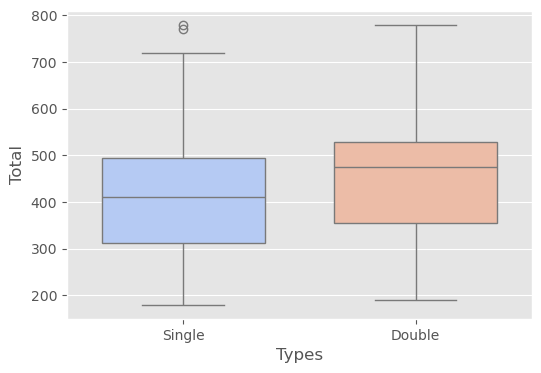

In [32]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Types', y='Total', hue='Types', palette='coolwarm', width=0.7,
            data=pd.DataFrame({'Total': pd.concat([single_type_pokemons.Total, double_type_pokemons.Total], axis=0),
                              'Types': np.repeat(['Single', 'Double'],[len(single_type_pokemons.Total),len(double_type_pokemons.Total)])})
           )

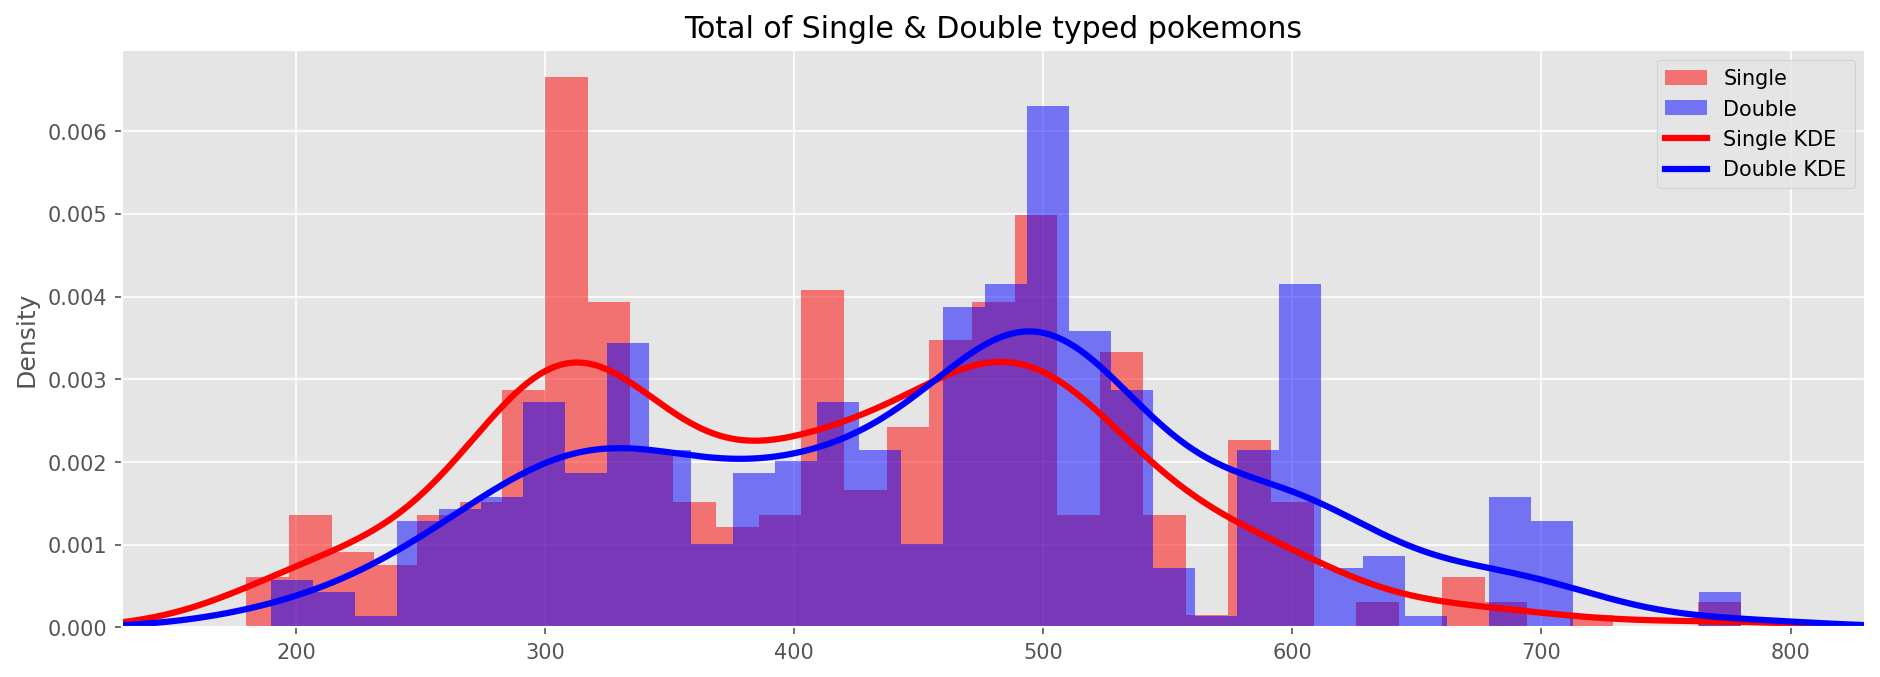

In [33]:
plt.figure(figsize=(15, 5), dpi=150)
single_type_pokemons.Total.hist(bins=35, density=True, alpha=0.5, color='red', label='Single')
double_type_pokemons.Total.hist(bins=35, density=True, alpha=0.5, color='blue', label='Double')

single_type_pokemons.Total.plot(kind='kde', linewidth=3, color='red', label='Single KDE')
double_type_pokemons.Total.plot(kind='kde', linewidth=3, color = 'blue', label='Double KDE')

plt.xlim(130, 830)
plt.title("Total of Single & Double typed pokemons")
plt.legend(loc='upper right')

**<span style="color:blue">•</span> Ответ:** Основываясь на значения квартилей распределения величины `Total` у покемонов с одним типов и с двойным, мы можем сказать, что общие показатели `Total` лучше у покемонов с двойными типами, поскольку значения квартилей у них выше.

### 2.4. У кого лучше средний показатель Защита (Defense): у покемонов типа Grass или у покемонов типа Fairy? (покемоны двойного типа учитываются)

**Определим, есть ли такие покемоны, которые относятся одновременно к двум типам сразу:**

In [37]:
pokemon_df[(pokemon_df['Type 1'] == 'Grass') & (pokemon_df['Type 2'] == 'Fairy') | (pokemon_df['Type 1'] == 'Fairy') & (pokemon_df['Type 2'] == 'Grass')]

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
606,606,546,Cottonee,Grass,Fairy,280,40,27,60,37,50,66,5,False
607,607,547,Whimsicott,Grass,Fairy,480,60,67,85,77,75,116,5,False


Да, есть два таких покемона. У обоих первый класс — `Grass`, а второй тип —`Fairy`. Условимся относить их одновременно к обоим типам.

In [39]:
defence_grass_pokemons = pokemon_df[(pokemon_df['Type 1'] == 'Grass') | (pokemon_df['Type 2'] == 'Grass')].Defense.mean()
defence_grass_pokemons

73.25263157894737

In [40]:
defence_fairy_pokemons = pokemon_df[(pokemon_df['Type 1'] == 'Fairy') | (pokemon_df['Type 2'] == 'Fairy')].Defense.mean()
defence_fairy_pokemons

70.4

**<span style="color:blue">•</span> Выводы о среднем показетеле защиты у покемонов типов `Grass` и `Fairy`:**

In [42]:
diff_grass_fairy = defence_grass_pokemons - defence_fairy_pokemons
print(f'Средний показатель Защита (Defense) у покемонов типа Grass выше чем у покемонов типа Fairy примерно на {round(diff_grass_fairy, 3)}.')

Средний показатель Защита (Defense) у покемонов типа Grass выше чем у покемонов типа Fairy примерно на 2.853.


### 2.5. Мы полагаем, что среднестатистический легендарный покемон должен быть сильнее, чем среднестатистический нелегендарный. Подтвердите или опровергните это предположение.

- **H0 гипотеза** средние силы легендарных и нелегендарных покемонов равны.
- **H1 гипотеза** средние силы легендарных и нелегендарных отличаются.

In [45]:
legendary_power = pokemon_df[pokemon_df.Legendary == True].Attack
non_legendary_power = pokemon_df[pokemon_df.Legendary == False].Attack

In [46]:
legendary_power_mean = legendary_power.mean()
non_legendary_power_mean = non_legendary_power.mean()

legendary_power_count = legendary_power.count()
non_legendary_power_count = non_legendary_power.count()

legendary_power_median = legendary_power.median()
non_legendary_power_median = non_legendary_power.median()

**<span style="color:blue">•</span> Среднее значение атаки (Attack) у легендарного и нелегендарного покемона:**

In [48]:
print(f'(mean) Легендарный покемон = {legendary_power_mean}')
print(f'(mean) Не легендарный покемон = {non_legendary_power_mean}')

(mean) Легендарный покемон = 116.67692307692307
(mean) Не легендарный покемон = 75.66938775510204


**<span style="color:blue">•</span> Медианное значение атаки (Attack) у легендарного и нелегендарного покемона:**

In [50]:
print(f'(median) Легендарный покемон = {legendary_power_median}')
print(f'(median) Не легендарный покемон = {non_legendary_power_median}')

(median) Легендарный покемон = 110.0
(median) Не легендарный покемон = 72.0


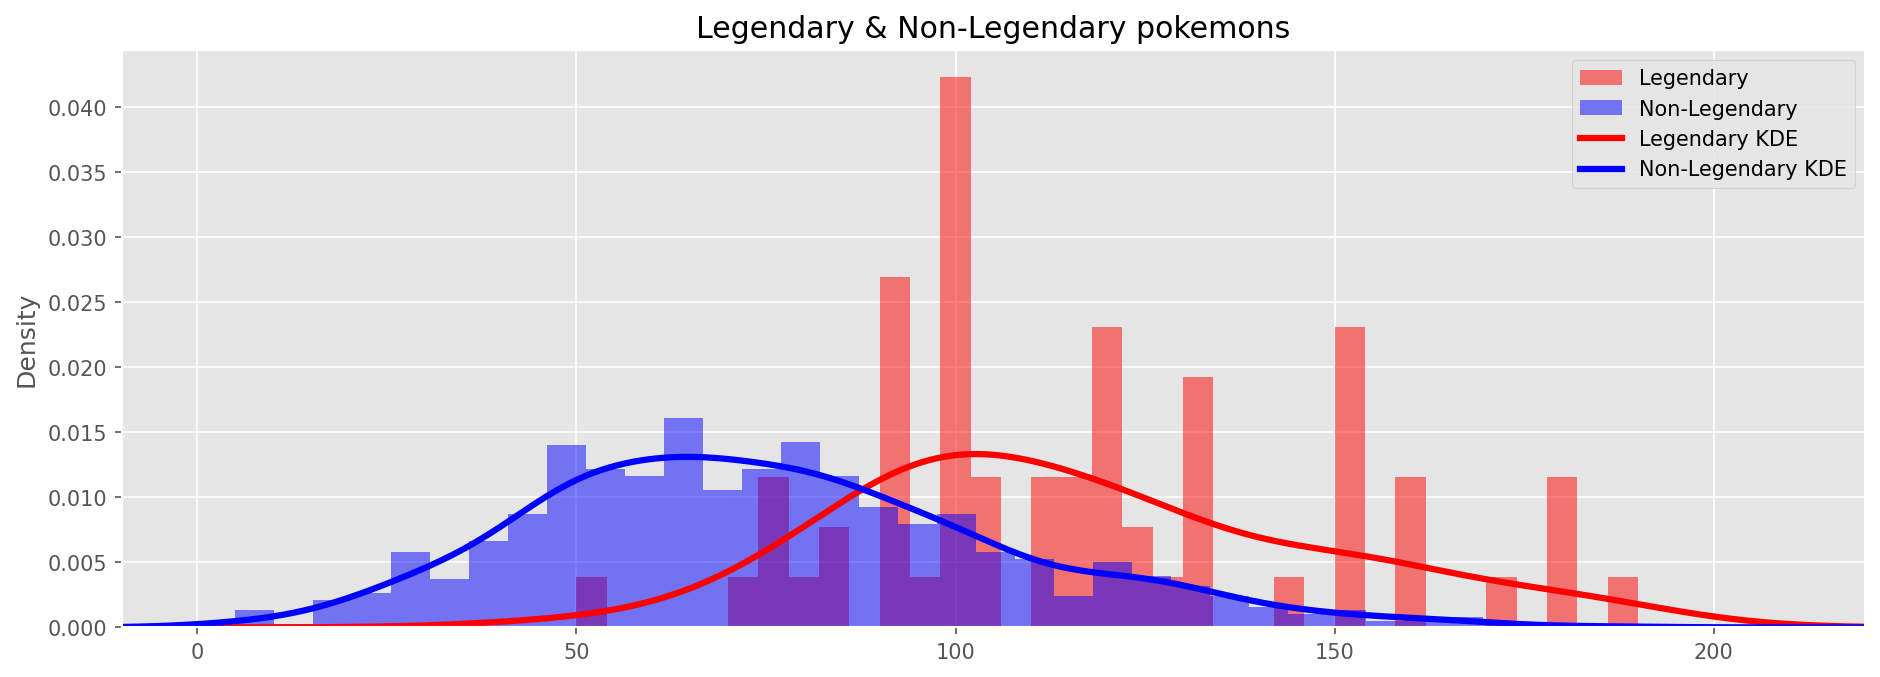

In [51]:
plt.figure(figsize=(15, 5), dpi=150)

legendary_power.hist(bins=35, density=True, alpha=0.5, color='red', label='Legendary')
non_legendary_power.hist(bins=35, density=True, alpha=0.5, color='blue', label='Non-Legendary')

legendary_power.plot(kind='kde', linewidth=3, color='red', label='Legendary KDE')
non_legendary_power.plot(kind='kde', linewidth=3, color = 'blue', label='Non-Legendary KDE')

plt.xlim(-10, 220)
plt.title("Legendary & Non-Legendary pokemons")
plt.legend(loc='upper right')

**Проверим распределения на нормальность:**

In [53]:
stats.shapiro(legendary_power.values)

ShapiroResult(statistic=0.9607941508293152, pvalue=0.03771919757127762)

In [54]:
stats.shapiro(non_legendary_power.values)

ShapiroResult(statistic=0.9808362722396851, pvalue=3.185968466823397e-08)

<span style="color:blue">•</span> Значения p-value в обоих случаях меньше 0.05 поэтому мы не можем принять нулевую гипотезу о нормальности распределения выбранных характеристик.

In [56]:
stats.kruskal(legendary_power, non_legendary_power)

KruskalResult(statistic=80.15947347479317, pvalue=3.4537878574753413e-19)

In [57]:
anova_list = []
for _ in range(100):
    non_leg_sample = non_legendary_power.sample(legendary_power_count)
    _, p_value = stats.f_oneway(legendary_power, non_leg_sample)
    anova_list.append(p_value)

In [58]:
sum(anova_list)/len(anova_list)

3.913550256320638e-10

**<span style="color:blue">•</span> Отвергаем нулевую гипотезу о равенстве медиан / средних. В данных есть статистически значимая различия.**

### 2.6. Покажите все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем нелегендарный. Сколько таких случаев?

In [61]:
pokemon_cross_df = pokemon_df.merge(pokemon_df, how='cross')
pokemon_cross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640000 entries, 0 to 639999
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0_x  640000 non-null  int64 
 1   #_x           640000 non-null  int64 
 2   Name_x        640000 non-null  object
 3   Type 1_x      640000 non-null  object
 4   Type 2_x      331200 non-null  object
 5   Total_x       640000 non-null  int64 
 6   HP_x          640000 non-null  int64 
 7   Attack_x      640000 non-null  int64 
 8   Defense_x     640000 non-null  int64 
 9   Sp. Atk_x     640000 non-null  int64 
 10  Sp. Def_x     640000 non-null  int64 
 11  Speed_x       640000 non-null  int64 
 12  Generation_x  640000 non-null  int64 
 13  Legendary_x   640000 non-null  bool  
 14  Unnamed: 0_y  640000 non-null  int64 
 15  #_y           640000 non-null  int64 
 16  Name_y        640000 non-null  object
 17  Type 1_y      640000 non-null  object
 18  Type 2_y      331200 non

**<span style="color:blue">•</span> Все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем нелегендарный:**

In [63]:
pokemon_cross_total_df = (pokemon_cross_df[(pokemon_cross_df.Legendary_x == True) 
                    & (pokemon_cross_df.Total_x < pokemon_cross_df.Total_y) 
                    & (pokemon_cross_df.Legendary_y == False)]
                    [['Name_x', 'Legendary_x', 'Total_x', 'Total_y', 'Legendary_y', 'Name_y']].reset_index()
    )
pokemon_cross_total_df


,index,Name_x,Legendary_x,Total_x,Total_y,Legendary_y,Name_y
0,124803,Articuno,True,580,625,False,VenusaurMega Venusaur
1,124807,Articuno,True,580,634,False,CharizardMega Charizard X
2,124808,Articuno,True,580,634,False,CharizardMega Charizard Y
3,124812,Articuno,True,580,630,False,BlastoiseMega Blastoise
4,124871,Articuno,True,580,590,False,AlakazamMega Alakazam
...,...,...,...,...,...,...,...
1260,639609,Volcanion,True,600,700,False,SalamenceMega Salamence
1261,639613,Volcanion,True,600,700,False,MetagrossMega Metagross
1262,639694,Volcanion,True,600,700,False,GarchompMega Garchomp
1263,639698,Volcanion,True,600,625,False,LucarioMega Lucario


**<span style="color:blue">•</span> Количество искомых пар:**

In [65]:
print(f'Количество искомых пар = {pokemon_cross_total_df.shape[0]}')

Количество искомых пар = 1265


### 2.7. Для каждой пары, в которой нелегендарный покемон оказывается сильнее легендарного посчитайте разницу в показателе Total. Постройте гистограму полученной величины. Похоже ли распределение на нормальное? Рассчитайте среднее арифметическое, медиану и моду данной величины.

In [67]:
pokemon_cross_total_df['Diff_Total'] = pokemon_cross_total_df.Total_y - pokemon_cross_total_df.Total_x
pokemon_cross_total_df

,index,Name_x,Legendary_x,Total_x,Total_y,Legendary_y,Name_y,Diff_Total
0,124803,Articuno,True,580,625,False,VenusaurMega Venusaur,45
1,124807,Articuno,True,580,634,False,CharizardMega Charizard X,54
2,124808,Articuno,True,580,634,False,CharizardMega Charizard Y,54
3,124812,Articuno,True,580,630,False,BlastoiseMega Blastoise,50
4,124871,Articuno,True,580,590,False,AlakazamMega Alakazam,10
...,...,...,...,...,...,...,...,...
1260,639609,Volcanion,True,600,700,False,SalamenceMega Salamence,100
1261,639613,Volcanion,True,600,700,False,MetagrossMega Metagross,100
1262,639694,Volcanion,True,600,700,False,GarchompMega Garchomp,100
1263,639698,Volcanion,True,600,625,False,LucarioMega Lucario,25


In [68]:
pokemon_cross_total_df.Diff_Total.describe()

count    1265.000000
mean       38.746245
std        30.375753
min        10.000000
25%        20.000000
50%        25.000000
75%        50.000000
max       120.000000
Name: Diff_Total, dtype: float64

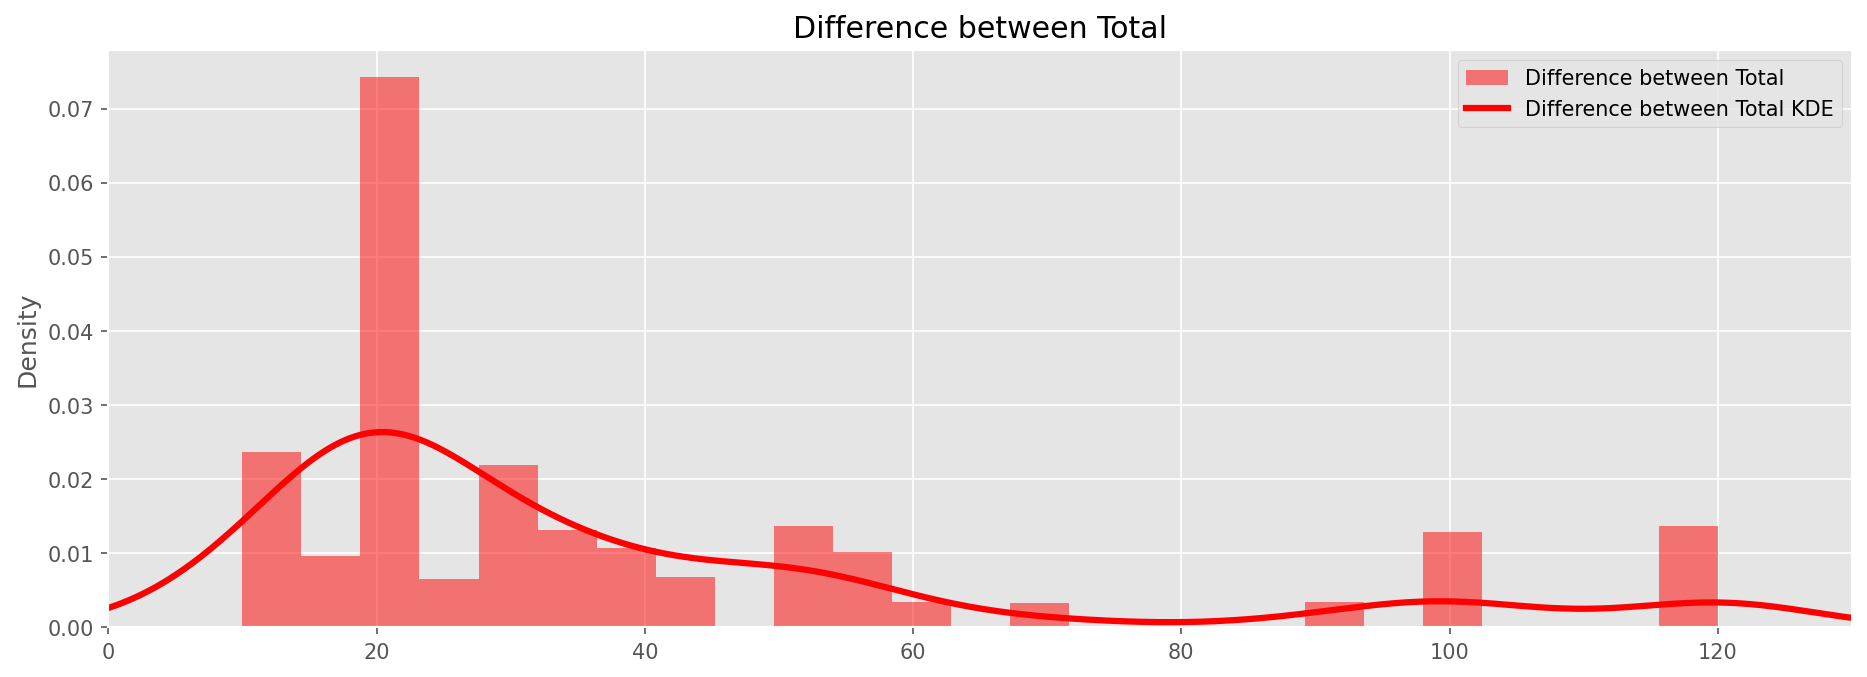

In [69]:
plt.figure(figsize=(15, 5), dpi=150)

pokemon_cross_total_df.Diff_Total.hist(bins=25, density=True, alpha=0.5, color='red', label='Difference between Total')

pokemon_cross_total_df.Diff_Total.plot(kind='kde', linewidth=3, color='red', label='Difference between Total KDE')

plt.xlim(0, 130)
plt.title("Difference between Total")
plt.legend(loc='upper right')

**<span style="color:blue">•</span> Среднее арифметическое:**

In [71]:
pokemon_cross_total_df.Diff_Total.mean()

38.74624505928854

**<span style="color:blue">•</span> Медиана:**

In [73]:
pokemon_cross_total_df.Diff_Total.median()

25.0

**<span style="color:blue">•</span> Мода:**

In [75]:
pokemon_cross_total_df.Diff_Total.mode().values

array([20])

**<span style="color:blue">•</span> Проверка на нормальность:**

In [77]:
stats.shapiro(pokemon_cross_total_df.Diff_Total)

ShapiroResult(statistic=0.7626064419746399, pvalue=2.9042527244456137e-39)

### 2.8. Назовите две характеристики покемонов, которые коррелируют в наименьшей степени.

In [79]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   #           800 non-null    int64 
 2   Name        800 non-null    object
 3   Type 1      800 non-null    object
 4   Type 2      414 non-null    object
 5   Total       800 non-null    int64 
 6   HP          800 non-null    int64 
 7   Attack      800 non-null    int64 
 8   Defense     800 non-null    int64 
 9   Sp. Atk     800 non-null    int64 
 10  Sp. Def     800 non-null    int64 
 11  Speed       800 non-null    int64 
 12  Generation  800 non-null    int64 
 13  Legendary   800 non-null    bool  
dtypes: bool(1), int64(10), object(3)
memory usage: 82.2+ KB


In [80]:
pokemon_corr_df = pokemon_df.iloc[:, 6:12].corr(method='spearman')
pokemon_corr_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.565734,0.433402,0.470813,0.493280,0.265920
Attack,0.565734,1.000000,0.514995,0.361616,0.320620,0.373443
Defense,0.433402,0.514995,1.000000,0.314217,0.578816,0.092818
Sp. Atk,0.470813,0.361616,0.314217,1.000000,0.571757,0.460220
Sp. Def,0.493280,0.320620,0.578816,0.571757,1.000000,0.320649
Speed,0.265920,0.373443,0.092818,0.460220,0.320649,1.000000


<Axes: >

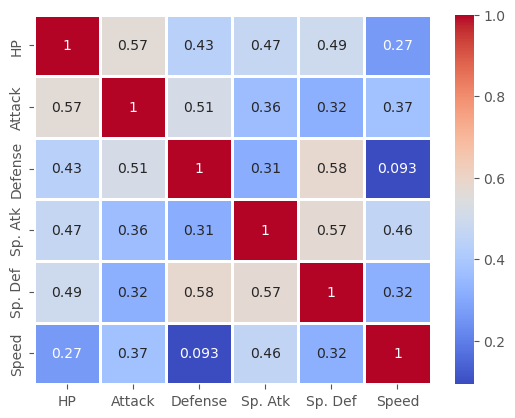

In [81]:
sns.heatmap(pokemon_corr_df, cmap='coolwarm', annot=True, linewidths=2, linecolor='white')

In [82]:
pokemon_corr_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.565734,0.433402,0.470813,0.493280,0.265920
Attack,0.565734,1.000000,0.514995,0.361616,0.320620,0.373443
Defense,0.433402,0.514995,1.000000,0.314217,0.578816,0.092818
Sp. Atk,0.470813,0.361616,0.314217,1.000000,0.571757,0.460220
Sp. Def,0.493280,0.320620,0.578816,0.571757,1.000000,0.320649
Speed,0.265920,0.373443,0.092818,0.460220,0.320649,1.000000


In [83]:
min_corr = pokemon_corr_df.min().min()

**<span style="color:blue">•</span> Две искомых характеристики покемонов, которые коррелируют в наименьшей степени:**

In [85]:
pokemon_corr_df.columns[pokemon_corr_df.isin([min_corr]).any()].tolist()

['Defense', 'Speed']

### 2.9. Что делает покемона легендарным, кроме суммы характеристик? Важнее сила атаки или сила защиты, а может сила специальной атаки или сила специальной защиты, или скорость, или здоровье? А может важна уникальность типа или поколение покемона? Подкрепите свое мнение расчетами.

#### Корреляционный метод

In [88]:
pokemon_leg_corr_df = pokemon_df.iloc[:, 6:14]
pokemon_leg_corr_df.Legendary = pokemon_leg_corr_df.Legendary.apply(int)

pokemon_leg_corr_m_df = pokemon_leg_corr_df.corr(method='spearman')
pokemon_leg_corr_m_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
HP,1.000000,0.565734,0.433402,0.470813,0.493280,0.265920,0.081784,0.295348
Attack,0.565734,1.000000,0.514995,0.361616,0.320620,0.373443,0.054140,0.316741
Defense,0.433402,0.514995,1.000000,0.314217,0.578816,0.092818,0.057776,0.268258
Sp. Atk,0.470813,0.361616,0.314217,1.000000,0.571757,0.460220,0.039242,0.372532
Sp. Def,0.493280,0.320620,0.578816,0.571757,1.000000,0.320649,0.018625,0.329321
Speed,0.265920,0.373443,0.092818,0.460220,0.320649,1.000000,-0.014198,0.313383
Generation,0.081784,0.054140,0.057776,0.039242,0.018625,-0.014198,1.000000,0.079277
Legendary,0.295348,0.316741,0.268258,0.372532,0.329321,0.313383,0.079277,1.000000


**<span style="color:blue">•</span> Тепловая карта корреляций:**

<Axes: >

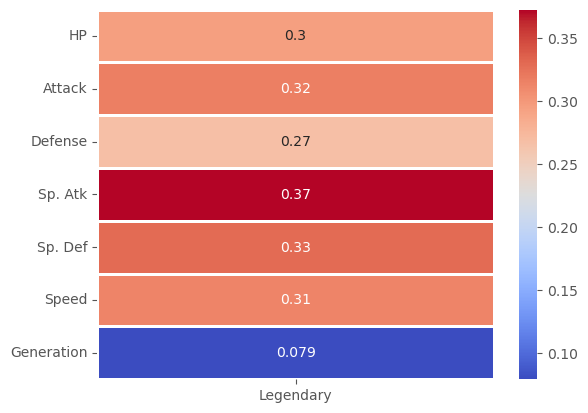

In [90]:
sns.heatmap(pokemon_leg_corr_m_df.loc[:'Generation',['Legendary']], cmap='coolwarm', annot=True, linewidths=2, linecolor='white')

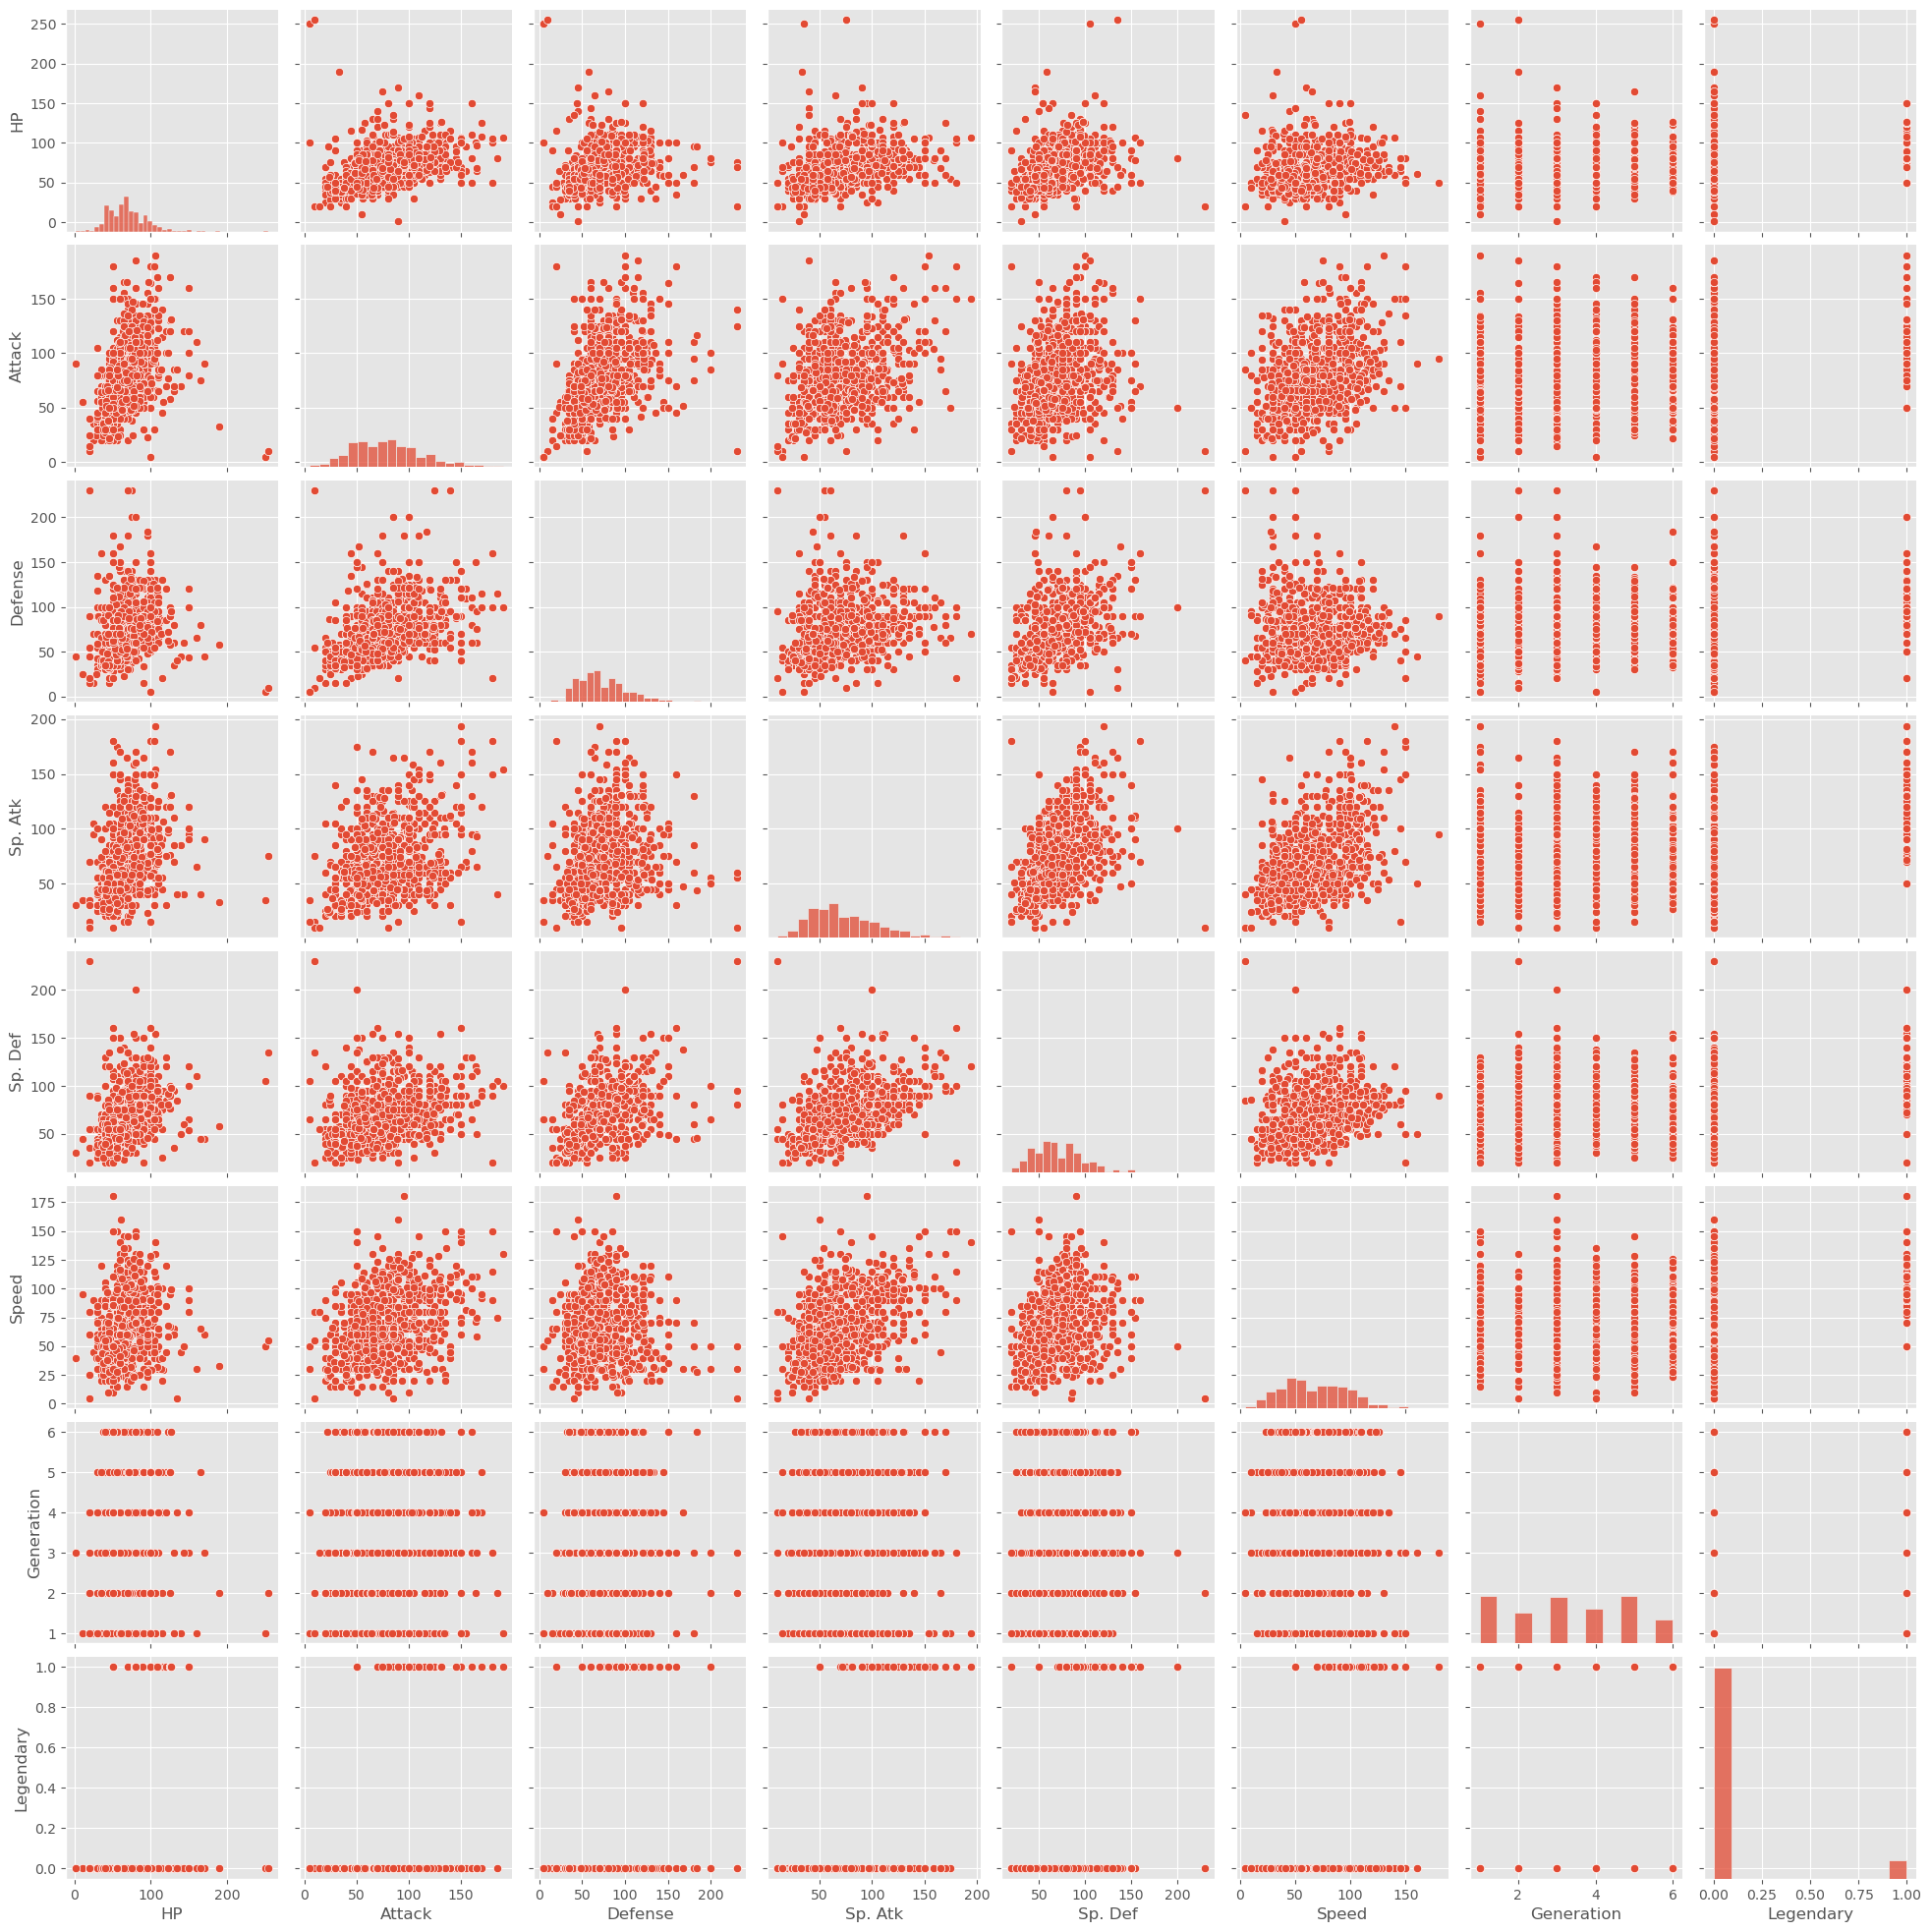

In [91]:
sns.pairplot(pokemon_leg_corr_df)

#### Метод построения логистической регрессии

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [94]:
pokemon_features_df = pokemon_df.iloc[:, 6:14]
pokemon_features_df.Legendary = pokemon_features_df.Legendary.apply(int)
pokemon_features_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,0
1,60,62,63,80,80,60,1,0
2,80,82,83,100,100,80,1,0
3,80,100,123,122,120,80,1,0
4,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1
796,50,160,110,160,110,110,6,1
797,80,110,60,150,130,70,6,1
798,80,160,60,170,130,80,6,1


In [95]:
feature_cols = ['HP', 'Attack',	'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

X = pokemon_features_df[feature_cols]
y = pokemon_features_df.Legendary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [96]:
model_logreg = LogisticRegression(random_state=11)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [97]:
y_pred = model_logreg.predict(X_test)
# y_pred = ((model_logreg.predict_proba(X_test) >= 0.5)[:, 1]).astype(int)
y_pred == y_test

514    True
168    True
144    True
123    True
521    True
       ... 
772    True
566    True
548    True
485    True
622    True
Name: Legendary, Length: 200, dtype: bool

In [98]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[180,   2],
       [  6,  12]])

Text(0.5, 427.9555555555555, 'Predicted label')

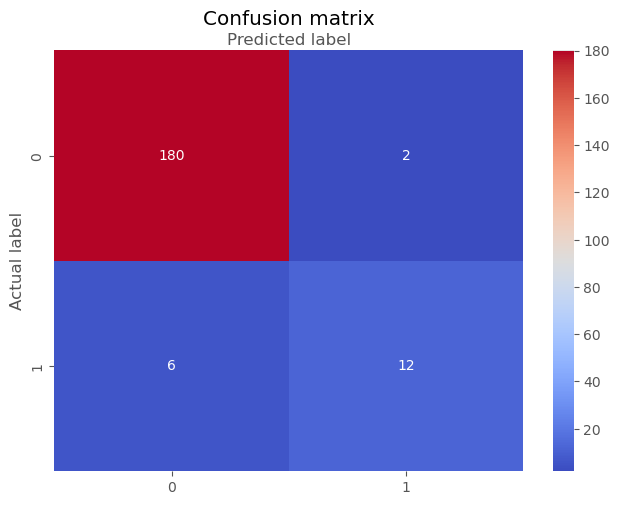

In [99]:
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='coolwarm', fmt='g')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

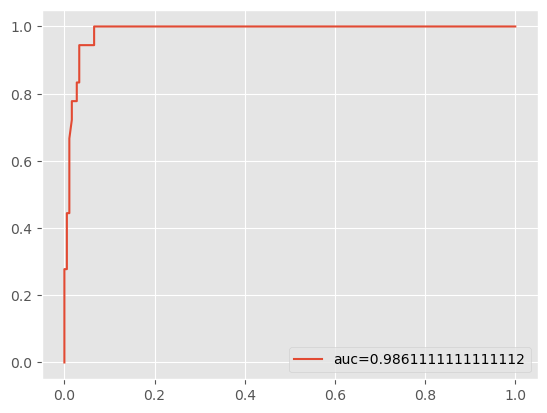

In [100]:
y_pred_proba = model_logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc=' + str(auc))
plt.legend(loc=4)

In [101]:
target_names = ['non-Legendary', 'Legendary']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

non-Legendary       0.97      0.99      0.98       182
    Legendary       0.86      0.67      0.75        18

     accuracy                           0.96       200
    macro avg       0.91      0.83      0.86       200
 weighted avg       0.96      0.96      0.96       200



- **Accuracy** — доля правильных ответов модели = (TP + TN) / (TP + TN + FP + FN)
- **Precision (точность)** — можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными = TP / (TP + FP)
- **Recall (полнотоа)** — показывает, какую долю объектов положительного класса из всех объектов положительного класса нашла модель = TP / (TP + FN)
- **F1-score** — метрика, которая объединяет в себе информацию о точности и полноте нашей модели = 2*TP / (2*TP + FN + FP)

**<span style="color:blue">•</span> Искомые веса логистической регрессии для оценки "вклада" каждого признака в легендарность покемона:**

In [104]:
for feature, pvalue in zip(model_logreg.feature_names_in_, model_logreg.coef_[0]):
    print(f'[{feature}] weight = {round(pvalue, 2)}')

[HP] weight = 0.03
[Attack] weight = 0.02
[Defense] weight = 0.04
[Sp. Atk] weight = 0.04
[Sp. Def] weight = 0.05
[Speed] weight = 0.06
[Generation] weight = 0.38


#### ANOVA
В качестве альтернативы можно провести однофакторный дисперсионный анализ ANOVA для того, чтобы посмотреть изменяется ли среднее значение числовых признаков в зависимости от целевого признака `Legendary`. Хотя этот способ не даст нам количественно измерить уровень корреляции, но мы сможем понять, существует ли связь между признаками.

In [106]:
pokemon_leg_df = pokemon_df.iloc[:, 6:14]
pokemon_leg_df.Legendary = pokemon_leg_df.Legendary.apply(int)
pokemon_leg_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,0
1,60,62,63,80,80,60,1,0
2,80,82,83,100,100,80,1,0
3,80,100,123,122,120,80,1,0
4,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1
796,50,160,110,160,110,110,6,1
797,80,110,60,150,130,70,6,1
798,80,160,60,170,130,80,6,1


In [107]:
for feature in feature_cols:
    cat_group_lists = pokemon_leg_df.groupby('Legendary')[feature].apply(list)
    anova_result = stats.f_oneway(*cat_group_lists)
    print(f'[{feature}] p-value = {anova_result[1]}')
    

[HP] p-value = 3.330647684845447e-15
[Attack] p-value = 7.827253003204001e-24
[Defense] p-value = 1.584222609442392e-12
[Sp. Atk] p-value = 6.314915770426125e-41
[Sp. Def] p-value = 1.8439809580406472e-26
[Speed] p-value = 2.354075443689382e-21
[Generation] p-value = 0.024009681921381747


#### Влияние типа покемона на легендарность

In [109]:
pokemon_tp_df = pokemon_df.iloc[:, 3:14]
pokemon_tp_df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [110]:
pokemon_tp_df.groupby(['Type 1'])['Legendary'].agg('sum')

Type 1
Bug          0
Dark         2
Dragon      12
Electric     4
Fairy        1
Fighting     0
Fire         5
Flying       2
Ghost        2
Grass        3
Ground       4
Ice          2
Normal       2
Poison       0
Psychic     14
Rock         4
Steel        4
Water        4
Name: Legendary, dtype: int64

In [111]:
pokemon_tp_df.groupby(['Type 2'])['Legendary'].agg('sum')

Type 2
Bug          0
Dark         1
Dragon       4
Electric     1
Fairy        2
Fighting     4
Fire         3
Flying      13
Ghost        1
Grass        0
Ground       1
Ice          3
Normal       0
Poison       0
Psychic      5
Rock         0
Steel        1
Water        1
Name: Legendary, dtype: int64

**<span style="color:blue">•</span> Больше всего легендарных покемонов имеют первый тип `Dragon` и `Psychic` и второй тип `Flying`.**

## SQL

In [114]:
from pandasql import sqldf

In [115]:
pokemon_df.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**<span style="color:blue">•</span> SQL: Сколько % покемонов имеет двойной тип?:**

In [117]:
sqldf("""
            SELECT (COUNT(*) / (SELECT COUNT(*) * 1.0 FROM pokemon_df)) * 100 AS `Percent of double-typed pokemons`
            FROM pokemon_df
            WHERE `Type 2` IS NOT NULL
            
      """)

,Percent of double-typed pokemons
0,51.75


**<span style="color:blue">•</span> SQL: Среднее арифметическое значений характеристик легендарных и нелегендарных покемонов:**

In [119]:
sqldf("""
            SELECT AVG(`Total`) `Total`, AVG(`HP`) `HP`, AVG(`Attack`) `Attack`, AVG(`Attack`) `Attack`, AVG(`Sp. Atk`) `Sp. Atk`,
                   AVG(`Sp. Def`) `Sp. Def`, AVG(`Speed`) `Speed`, AVG(`Generation`) `Generation`, `Legendary`
            FROM pokemon_df
            GROUP BY `Legendary`
            ORDER BY `Legendary` DESC
            
      """)


,Total,HP,Attack,Attack,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,637.384615,92.738462,116.676923,116.676923,122.184615,105.938462,100.184615,3.769231,1
1,417.213605,67.182313,75.669388,75.669388,68.454422,68.892517,65.455782,3.284354,0


**<span style="color:blue">•</span> SQL: Найти все группы покемонов двойных типов, в которых есть хотя бы один легендарный покемон. Вычислить средние основных характеристик покемонов для этих групп:**

In [121]:
sqldf("""
            SELECT `Type 1`, `Type 2`,
                   AVG(`Total`) `Total`, AVG(`HP`) `HP`, AVG(`Attack`) `Attack`, AVG(`Attack`) `Attack`, AVG(`Sp. Atk`) `Sp. Atk`,
                   AVG(`Sp. Def`) `Sp. Def`, AVG(`Speed`) `Speed`, AVG(`Generation`) `Generation`, AVG(`Legendary`) `Legendary`
            FROM pokemon_df
            GROUP BY `Type 1`, `Type 2`
            HAVING `Legendary` > 0
            ORDER BY `Legendary` DESC
      """)

,Type 1,Type 2,Total,HP,Attack,Attack,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Dragon,Electric,680.000000,100.000000,150.0,150.0,120.000000,100.000000,90.000000,5.0,1.000000
1,Dragon,Fire,680.000000,100.000000,120.0,120.0,150.000000,120.000000,90.000000,5.0,1.000000
2,Dragon,Ice,686.666667,125.000000,140.0,140.0,140.000000,93.333333,95.000000,5.0,1.000000
3,Dragon,Psychic,650.000000,80.000000,100.0,100.0,135.000000,127.500000,110.000000,3.0,1.000000
4,Fire,Steel,600.000000,91.000000,90.0,90.0,130.000000,106.000000,77.000000,4.0,1.000000
5,Fire,Water,600.000000,80.000000,110.0,110.0,130.000000,90.000000,70.000000,6.0,1.000000
6,Flying,None,580.000000,79.000000,107.5,107.5,117.500000,85.000000,116.000000,5.0,1.000000
7,Ghost,Dragon,680.000000,150.000000,110.0,110.0,110.000000,110.000000,90.000000,4.0,1.000000
8,Ground,Fire,770.000000,100.000000,180.0,180.0,150.000000,90.000000,90.000000,3.0,1.000000
9,Psychic,Dark,680.000000,80.000000,160.0,160.0,170.000000,130.000000,80.000000,6.0,1.000000
